In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("resources/resources/Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe().T #weight 0 olamaz kaydı silmemiz gerekiyor

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [5]:
weight_zero_index=df[df["Weight"]==0].index
df.drop(weight_zero_index,inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,158.0,400.847468,357.697796,5.9000,121.25000,281.50000,650.00000,1650.000
Length1,158.0,26.293038,10.011427,7.5000,19.15000,25.30000,32.70000,59.000
Length2,158.0,28.465823,10.731707,8.4000,21.00000,27.40000,35.75000,63.400
Length3,158.0,31.280380,11.627605,8.8000,23.20000,29.70000,39.67500,68.000
Height,158.0,8.986790,4.295191,1.7284,5.94060,7.78900,12.37185,18.957
Width,158.0,4.424232,1.689010,1.0476,3.39865,4.27705,5.58675,8.142


In [7]:
df["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [8]:
def fish_species(species):
    if species == 'Bream':
        return 0
    if species == 'Roach':
        return 1
    if species == 'Whitefish':
        return 2
    if species == 'Parkki':
        return 3
    if species == 'Perch':
        return 4
    if species == 'Pike':
        return 5
    if species == 'Smelt':
        return 6
df["Species"] = df["Species"].apply(fish_species)

In [9]:
df["Species"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [10]:
df["Species"] = df["Species"].astype("int")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  158 non-null    int32  
 1   Weight   158 non-null    float64
 2   Length1  158 non-null    float64
 3   Length2  158 non-null    float64
 4   Length3  158 non-null    float64
 5   Height   158 non-null    float64
 6   Width    158 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 9.3 KB


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df_graph = pd.DataFrame({
    "Fish Species":df["Species"].value_counts().index,
    "Species Count":df["Species"].value_counts().values
})
df_graph

,Fish Species,Species Count
0,4,56
1,0,35
2,1,19
3,5,17
4,6,14
5,3,11
6,2,6


<AxesSubplot: title={'center': 'Fish Distribution'}, xlabel='Fish Species', ylabel='Species Count'>

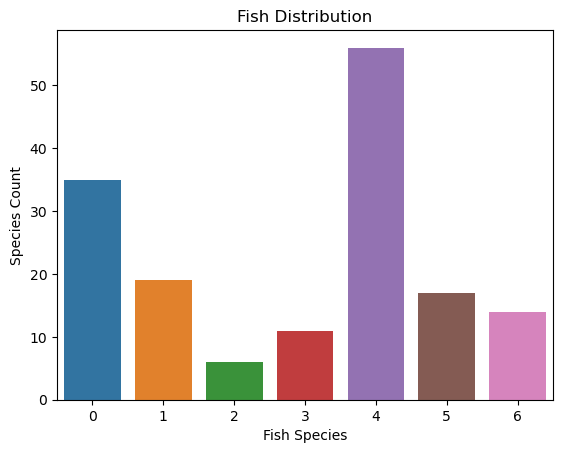

In [14]:
plt.title("Fish Distribution") 
sns.barplot(data=df_graph,x="Fish Species",y="Species Count")
# Görüldüğü üzere balık türleri ve onların adetleri oldukça adaletsiz dağıtılmış

In [15]:
y = df["Species"]
X = df.drop("Species",axis=1)

In [16]:
from imblearn.over_sampling import RandomOverSampler # Varolan verileri kullanarak fake veriler üretir
from collections import Counter

In [17]:
sampler = RandomOverSampler()
X_new,y_new = sampler.fit_resample(X,y) # giriş değişkenlerinden imbalanced dataset sorununu fake değerler üretip düzeltiyoruz
print(f"Eski Durum:{Counter(y)}");
print(f"Yeni Durum:{Counter(y_new)}") #Yeni fake verileri ürettik

Eski Durum:Counter({4: 56, 0: 35, 1: 19, 5: 17, 6: 14, 3: 11, 2: 6})
Yeni Durum:Counter({0: 56, 1: 56, 2: 56, 3: 56, 4: 56, 5: 56, 6: 56})


In [18]:
df = X_new.join(y_new) #df verilerimizi X başta y sonda olmak üzere güncelledik

<AxesSubplot: >

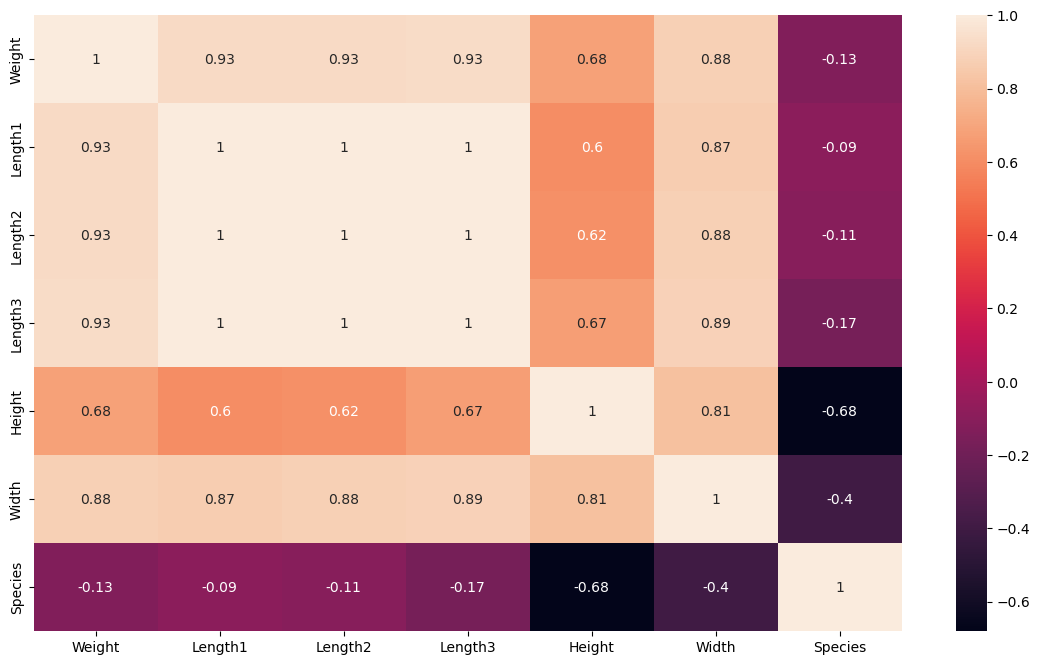

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)# Görüldüğü üzere Length1, Length2,Length3 arasında yüksek ilişki var 
#ve işlemlere devam edebilmek için bu ilişkiyi azaltmamız gerekiyor

In [20]:
import numpy as np

In [21]:
df["Length1"] = np.log(df["Length1"])+1
df["Length2"] = np.log(df["Length2"])+1
df["Length3"] = np.log(df["Length3"])+1

<AxesSubplot: >

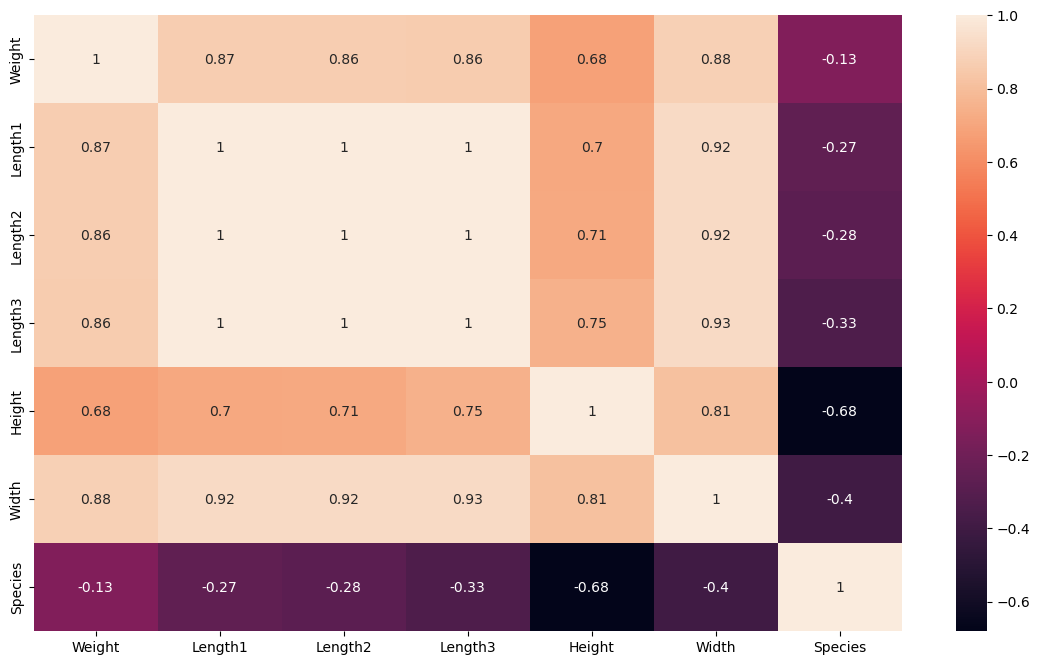

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [23]:
df.drop(['Length1','Length2','Width'],axis=1,inplace=True)
df.head()

,Weight,Length3,Height,Species
0,242.0,4.401197,11.5200,0
1,290.0,4.440418,12.4800,0
2,340.0,4.437208,12.3778,0
3,363.0,4.511545,12.7300,0
4,430.0,4.526361,12.4440,0


<AxesSubplot: >

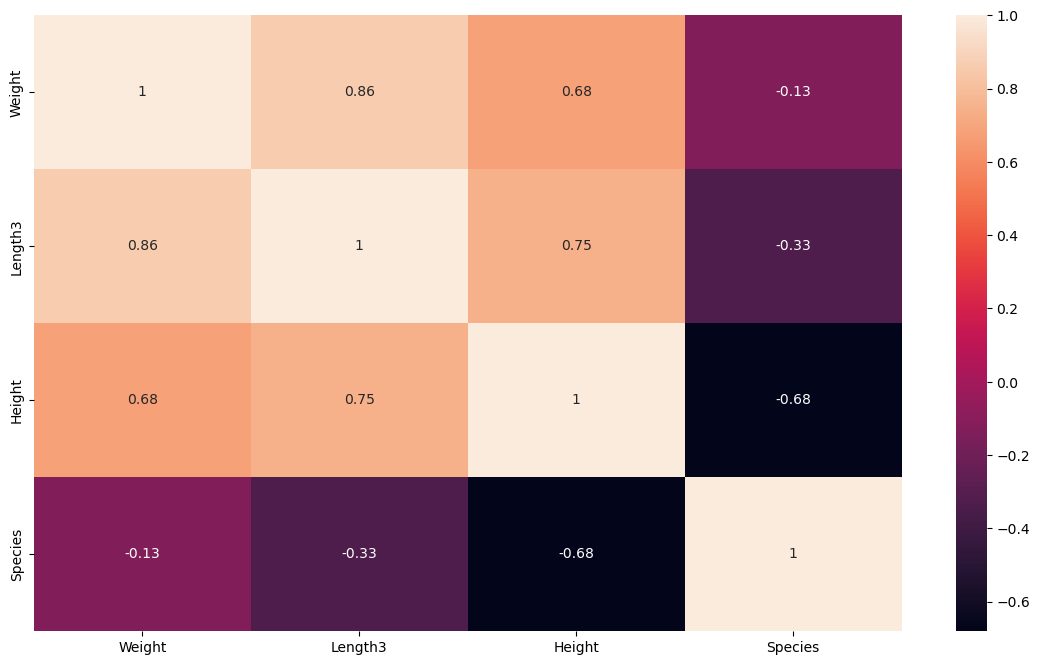

In [24]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [25]:
# Yüksek ilişkileri azaltmış olduk

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
model_tree=DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
print(f"Train accuracy score={accuracy_score(y_train,model_tree.predict(X_train))}")
print(f"Test accuracy score={accuracy_score(y_test,model_tree.predict(X_test))}")
#Görüldüğü üzere verilerimizde aşırı öğrenme var

Train accuracy score=1.0
Test accuracy score=0.8481012658227848


In [31]:
from sklearn import tree #karar ağacını çizeceğiz

[Text(0.6744791666666666, 0.9583333333333334, 'X[5] <= 2.168\ngini = 0.856\nsamples = 313\nvalue = [40, 47, 47, 48, 39, 50, 42]'),
 Text(0.5703125, 0.875, 'X[3] <= 9.8\ngini = 0.045\nsamples = 43\nvalue = [0, 0, 0, 0, 1, 0, 42]'),
 Text(0.5286458333333334, 0.7916666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]'),
 Text(0.6119791666666666, 0.7916666666666666, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 0, 0, 0, 0, 42]'),
 Text(0.7786458333333334, 0.875, 'X[4] <= 12.438\ngini = 0.832\nsamples = 270\nvalue = [40, 47, 47, 48, 38, 50, 0]'),
 Text(0.6953125, 0.7916666666666666, 'X[3] <= 45.35\ngini = 0.799\nsamples = 228\nvalue = [1, 47, 47, 48, 35, 50, 0]'),
 Text(0.6536458333333334, 0.7083333333333334, 'X[5] <= 4.243\ngini = 0.778\nsamples = 191\nvalue = [1, 47, 47, 48, 35, 13, 0]'),
 Text(0.4322916666666667, 0.625, 'X[4] <= 7.401\ngini = 0.675\nsamples = 117\nvalue = [0, 41, 0, 48, 20, 8, 0]'),
 Text(0.23958333333333334, 0.5416666666666666, 'X[1] <= 27.5\ngini = 0.642\n

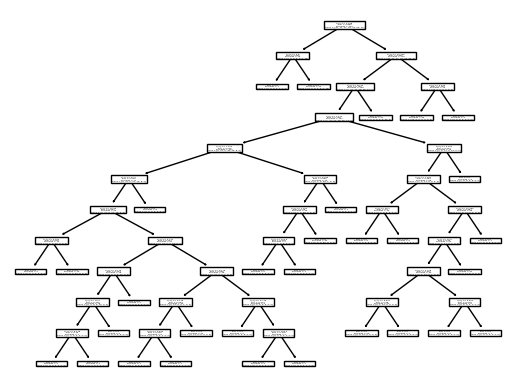

In [32]:
tree.plot_tree(model_tree)

In [33]:
path = model_tree.cost_complexity_pruning_path(X_train,y_train)
alphas = path["ccp_alphas"]

In [34]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    model_prune=DecisionTreeClassifier(ccp_alpha=i)
    model_prune.fit(X_train,y_train)
    y_train_pred = model_prune.predict(X_train)
    y_test_pred = model_prune.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

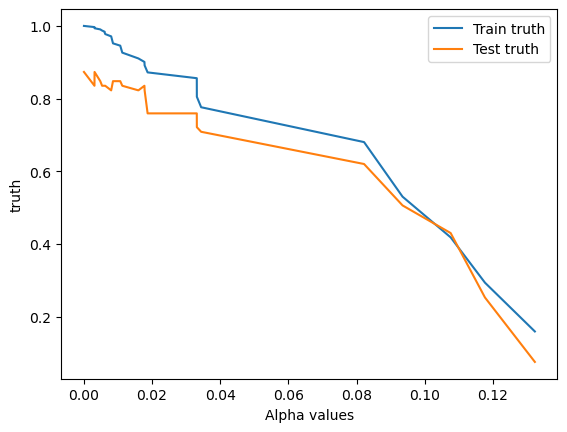

In [35]:
sns.lineplot(y=accuracy_train,x=alphas,label="Train truth")
sns.lineplot(y=accuracy_test,x=alphas,label="Test truth")
plt.xlabel("Alpha values")
plt.ylabel("truth")
plt.xticks()
plt.show()

In [36]:
model_tree_new=DecisionTreeClassifier(ccp_alpha=0.11)
model_tree_new.fit(X_train,y_train)
print(f"Train accuracy score={accuracy_score(y_train,model_tree_new.predict(X_train))}")
print(f"Test accuracy score={accuracy_score(y_test,model_tree_new.predict(X_test))}")

Train accuracy score=0.4185303514376997
Test accuracy score=0.43037974683544306


[Text(0.4, 0.8333333333333334, 'X[5] <= 2.168\ngini = 0.856\nsamples = 313\nvalue = [40, 47, 47, 48, 39, 50, 42]'),
 Text(0.2, 0.5, 'gini = 0.045\nsamples = 43\nvalue = [0, 0, 0, 0, 1, 0, 42]'),
 Text(0.6, 0.5, 'X[4] <= 12.438\ngini = 0.832\nsamples = 270\nvalue = [40, 47, 47, 48, 38, 50, 0]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.799\nsamples = 228\nvalue = [1, 47, 47, 48, 35, 50, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.133\nsamples = 42\nvalue = [39, 0, 0, 0, 3, 0, 0]')]

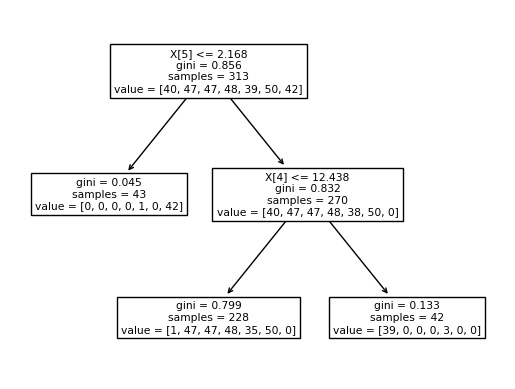

In [37]:
tree.plot_tree(model_tree_new)

<AxesSubplot: >

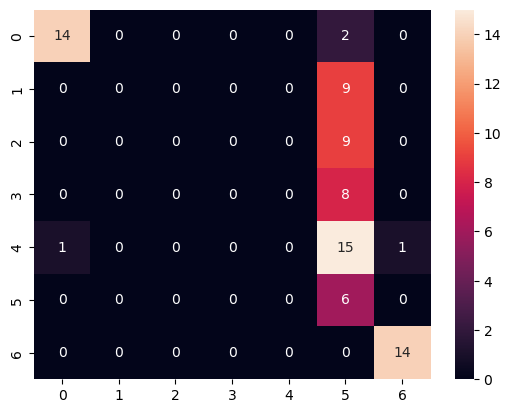

In [38]:
sns.heatmap(confusion_matrix(y_test,model_tree_new.predict(X_test)),annot=True,fmt='g')

In [39]:
len(y_test)

79

In [40]:
(14+6+0+7+0+0+15)/79 # Test verisinin doğruluk oran

0.5316455696202531

In [41]:
model_tree_new.predict(X_test)

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 0, 5, 5, 5, 5, 6, 0, 6, 5, 5, 0, 6,
       5, 5, 5, 5, 5, 0, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 0, 6, 6, 6, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 0, 6, 6, 5, 0, 0, 0, 0, 5, 5, 5, 0, 5, 5,
       5, 0, 5, 0, 5, 5, 5, 5, 6, 5, 5, 0, 0])

In [42]:
y_test

78     4
274    3
246    2
55     2
387    6
      ..
361    6
82     4
114    4
3      0
18     0
Name: Species, Length: 79, dtype: int32

In [43]:
df = pd.read_csv("resources/resources/Fish.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [45]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [47]:
df_weight_zero_indexes = df[df["Weight"]==0].index

In [48]:
df_weight_zero_indexes

Int64Index([40], dtype='int64')

In [49]:
df.drop(df_weight_zero_indexes,inplace=True)

In [50]:
df = df.join(pd.get_dummies(df["Species"]))

In [51]:
df.drop("Species",axis=1,inplace=True)

In [52]:
X = df.drop("Weight",axis=1)
y = df["Weight"]
df = X.join(y)
df

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Weight
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0,242.0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0,290.0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0,340.0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0,363.0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0,430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0,12.2
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0,13.4
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0,12.2
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0,19.7


<AxesSubplot: >

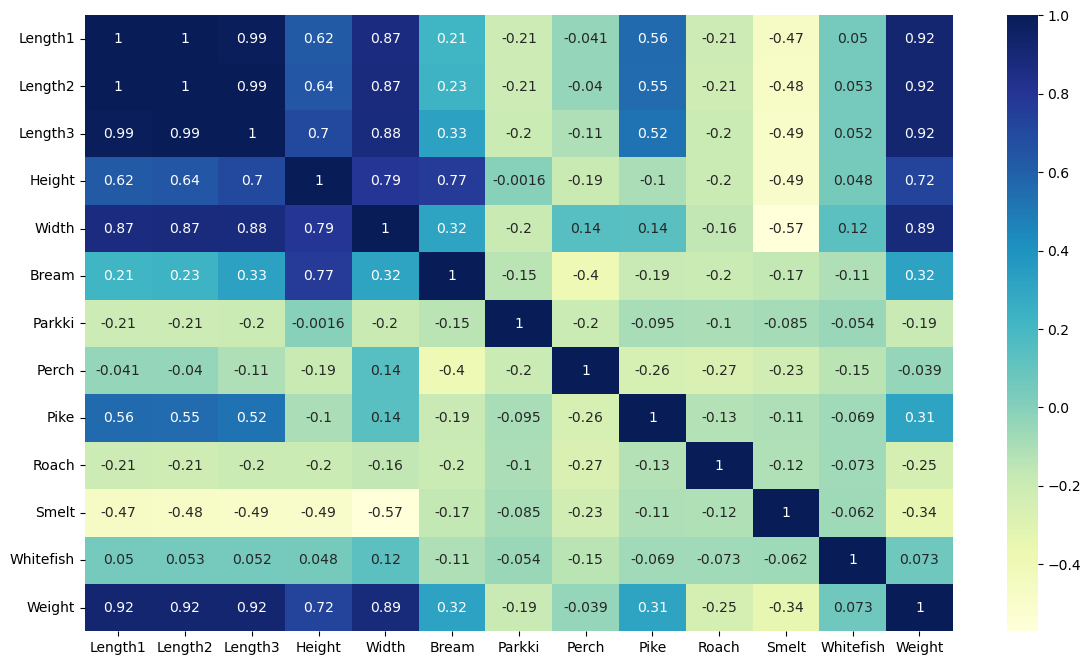

In [53]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [54]:
df.drop(["Length1","Length2"],inplace=True,axis=1)

<AxesSubplot: >

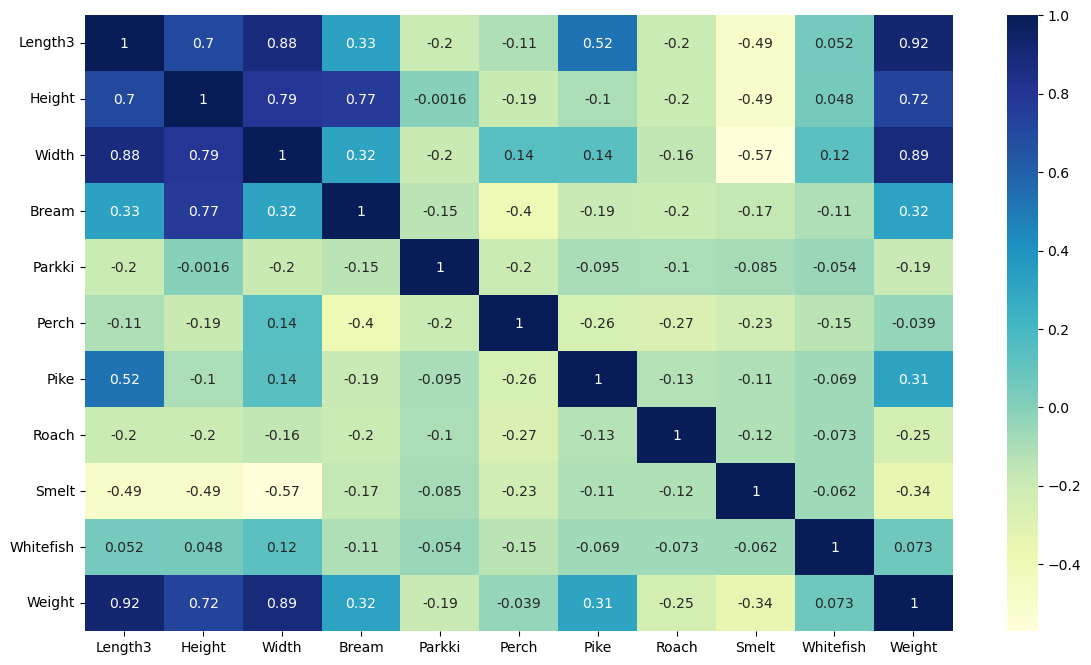

In [55]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [56]:
X = df.drop("Weight",axis=1)
y = df["Weight"]
df = X.join(y)
df

,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Weight
0,30.0,11.5200,4.0200,1,0,0,0,0,0,0,242.0
1,31.2,12.4800,4.3056,1,0,0,0,0,0,0,290.0
2,31.1,12.3778,4.6961,1,0,0,0,0,0,0,340.0
3,33.5,12.7300,4.4555,1,0,0,0,0,0,0,363.0
4,34.0,12.4440,5.1340,1,0,0,0,0,0,0,430.0
...,...,...,...,...,...,...,...,...,...,...,...
154,13.4,2.0904,1.3936,0,0,0,0,0,1,0,12.2
155,13.5,2.4300,1.2690,0,0,0,0,0,1,0,13.4
156,13.8,2.2770,1.2558,0,0,0,0,0,1,0,12.2
157,15.2,2.8728,2.0672,0,0,0,0,0,1,0,19.7


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
y_predict = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)
#Modelimiz %94 oranla doğru tahmin ediyor

0.9434291295580693

<AxesSubplot: xlabel='Weight'>

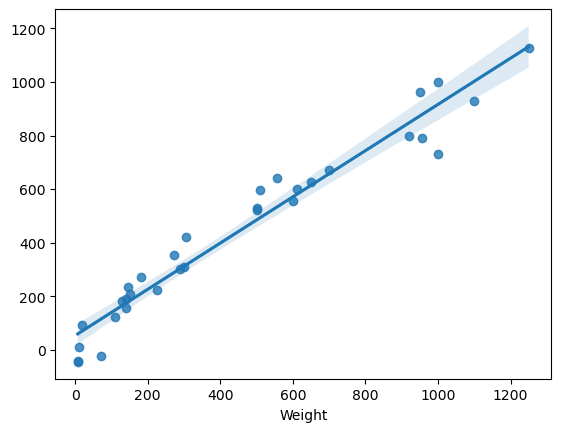

In [60]:
sns.regplot(x=y_test,y=y_predict)

In [61]:
#Kümeleme ile 

In [62]:
from sklearn.cluster import KMeans

In [63]:
df = pd.read_csv("resources/resources/Fish.csv")

In [64]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [65]:
df.info() #veriler hakkında genel bilgi aldık null veriler yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [67]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [68]:
Weight = df["Weight"]
df.drop("Weight",axis=1,inplace=True)
df = df.join(Weight)
df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


<Figure size 1400x500 with 0 Axes>

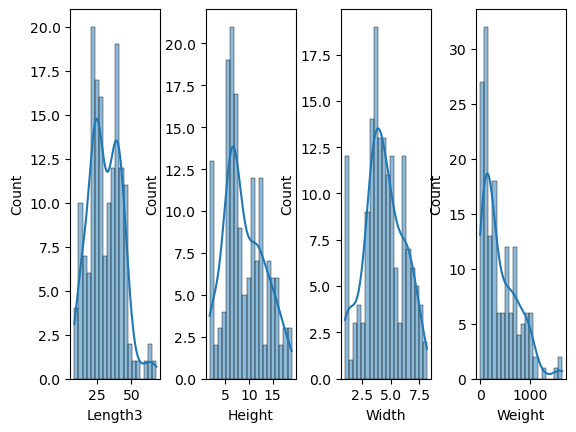

In [69]:
plt.figure(figsize=(14,5))
fig,ax=plt.subplots(1,4)
plt.subplots_adjust(hspace=0.5,wspace=0.5)
y=0
for col in df.columns[3:]:
    sns.histplot(df[col],bins=20,kde=True,ax=ax[y])
    y+=1

<AxesSubplot: xlabel='count', ylabel='Species'>

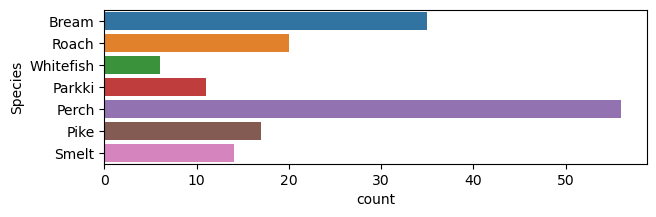

In [70]:
plt.figure(figsize=(7,2))
sns.countplot(data=df,y="Species")

<Figure size 2000x1000 with 0 Axes>

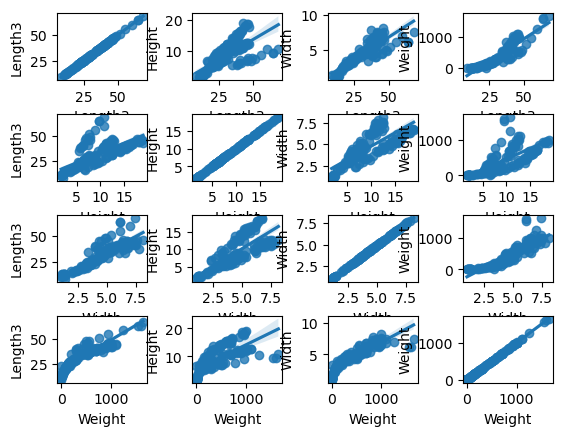

In [71]:
plt.figure(figsize=(20,10))
fig,ax = plt.subplots(4,4)
plt.subplots_adjust(hspace=0.5,wspace=0.5)
x=0
for first in df.columns[3:]:
    y=0
    for second in df.columns[3:]:
        sns.regplot(x=first,y=second,data=df,ax=ax[x,y])
        y+=1
    x+=1

<AxesSubplot: >

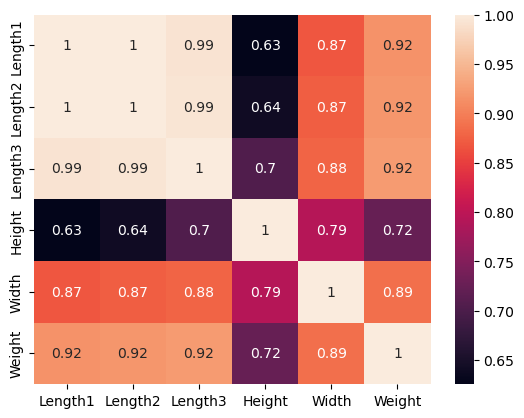

In [72]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: xlabel='Weight', ylabel='Width'>

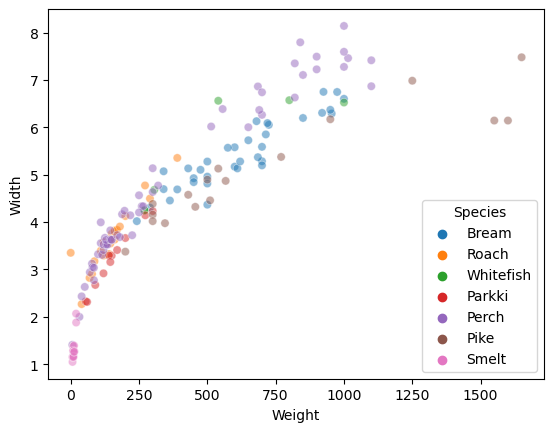

In [73]:
sns.scatterplot(x="Weight",y="Width",data=df,hue="Species",alpha=0.5)

In [74]:
df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


In [75]:
X = df[df.columns[3:]]
X

,Length3,Height,Width,Weight
0,30.0,11.5200,4.0200,242.0
1,31.2,12.4800,4.3056,290.0
2,31.1,12.3778,4.6961,340.0
3,33.5,12.7300,4.4555,363.0
4,34.0,12.4440,5.1340,430.0
...,...,...,...,...
154,13.4,2.0904,1.3936,12.2
155,13.5,2.4300,1.2690,13.4
156,13.8,2.2770,1.2558,12.2
157,15.2,2.8728,2.0672,19.7


In [76]:
uzaklik = []
for n in range(1,11):
    model = KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=42)
    model.fit(X)
    uzaklik.append(model.inertia_)

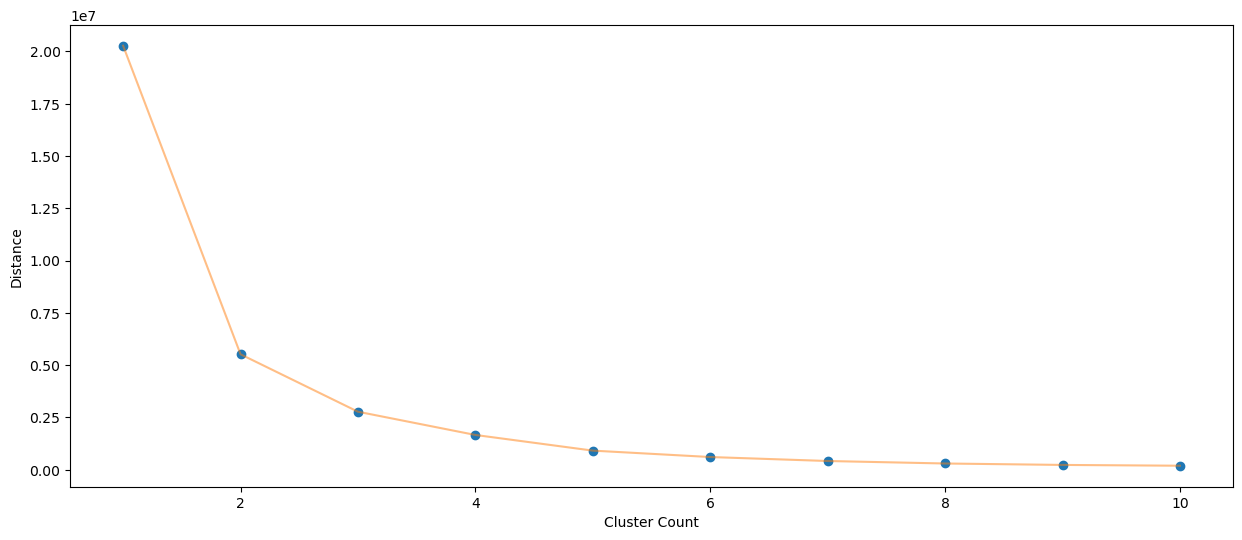

In [77]:
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11),uzaklik,'o')
plt.plot(np.arange(1,11),uzaklik,'-',alpha=0.5)
plt.xlabel("Cluster Count"), plt.ylabel("Distance")
plt.show()

In [79]:
model = (KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=42,algorithm='elkan'))
model.fit(X)
new_labels = model.labels_
merkezler = model.cluster_centers_

In [80]:
new_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [81]:
merkezler

array([[ 25.49541284,   7.01758257,   3.52415229, 192.08165138],
       [ 43.722     ,  13.22943   ,   6.364952  , 847.94      ]])